In [3]:
import numpy as np
import scipy.signal as signal
import time
import matplotlib.pyplot as plt


# --------------------------
# Overlap-Save implementation
# --------------------------
def overlap_save(x, h, block_size):
    N = len(x)
    M = len(h)
    L = block_size - M + 1
    h_fft = np.fft.fft(h, block_size)
    y = []

    # Pad signal at the beginning
    x_padded = np.concatenate([np.zeros(M-1), x])

    for i in range(0, len(x), L):
        x_block = x_padded[i:i + block_size]
        if len(x_block) < block_size:
            x_block = np.concatenate([x_block, np.zeros(block_size - len(x_block))])
        X = np.fft.fft(x_block)
        Y = np.fft.ifft(X * h_fft).real
        y.extend(Y[M-1:])

    return np.array(y[:N + M - 1])


# --------------------------
# Overlap-Add implementation
# --------------------------
def overlap_add(x, h, block_size):
    N = len(x)
    M = len(h)
    L = block_size - M + 1
    h_fft = np.fft.fft(h, block_size)
    y = np.zeros(N + M - 1)

    for i in range(0, N, L):
        x_block = x[i:i + L]
        x_block_padded = np.concatenate([x_block, np.zeros(block_size - len(x_block))])
        X = np.fft.fft(x_block_padded)
        Y = np.fft.ifft(X * h_fft).real
        y[i:i + block_size] += Y[:min(block_size, len(y) - i)]

    return y

Numpy Convolution Time       : 0.213413s
Overlap-Save FFT Time        : 0.141484s | Error: 5.607768e-22
Overlap-Add FFT Time         : 0.031424s | Error: 5.600532e-22


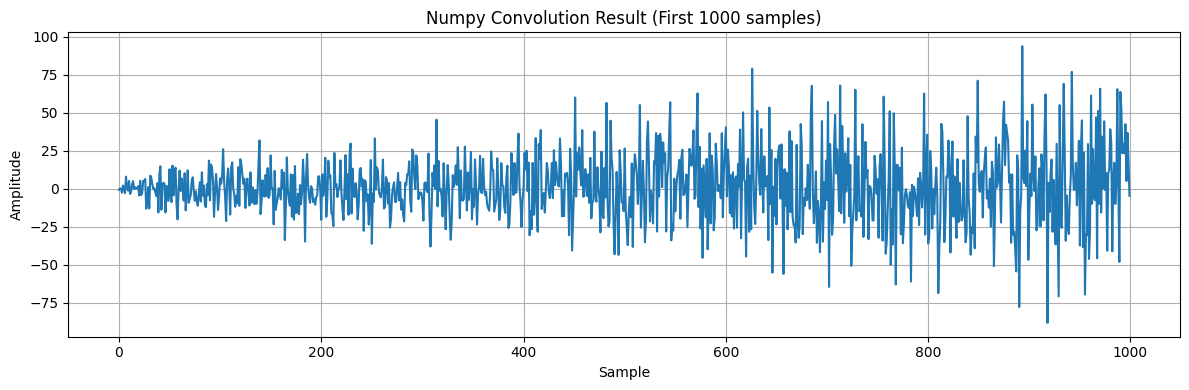

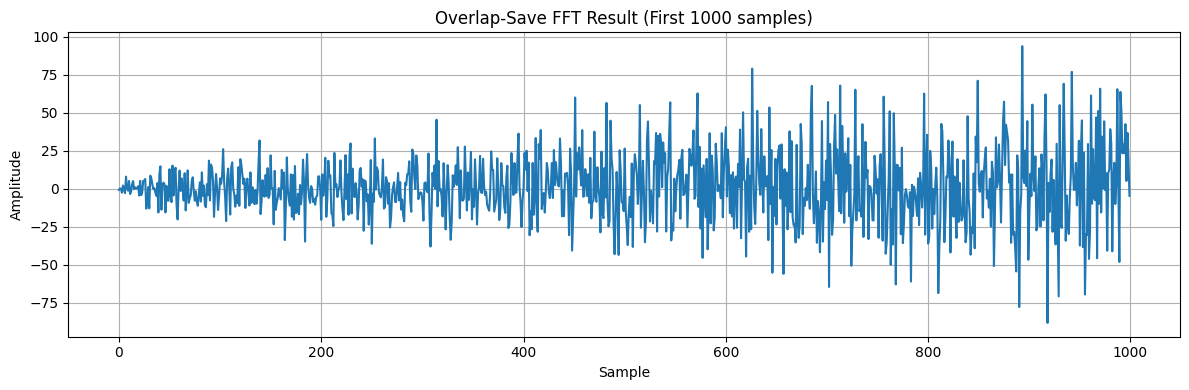

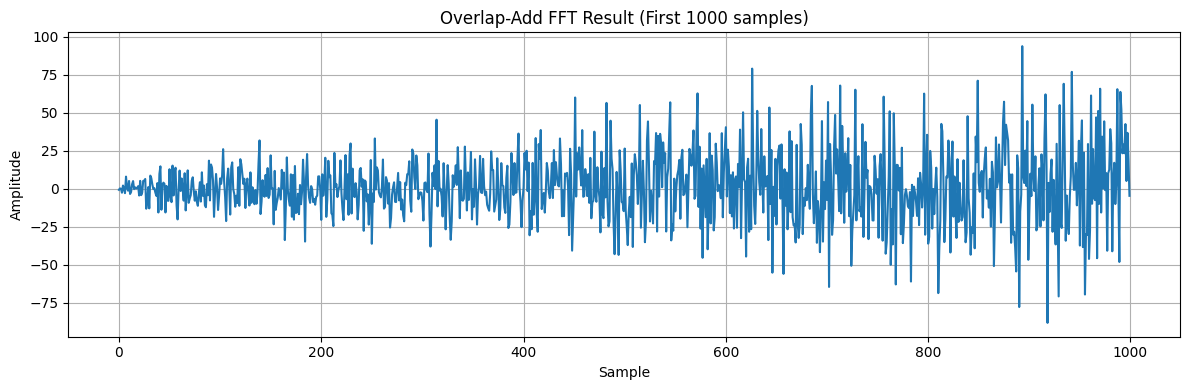

In [4]:
# --------------------------
# Signal generation
# --------------------------
N = int(1e6)  # Length of the signal
L = 2000      # Length of the impulse response
x = np.random.randn(N)
h = np.random.randn(L)

# --------------------------
# Reference convolution (numpy)
# --------------------------
start = time.time()
y_ref = np.convolve(x, h, mode='full')
time_conv = time.time() - start

# --------------------------
# Overlap-Save method
# --------------------------
block_size = 8192  # Must be >= len(h)
start = time.time()
y_os = overlap_save(x, h, block_size)
time_overlap = time.time() - start
error_os = np.sum((y_ref - y_os) ** 2)

# --------------------------
# Overlap-Add method
# --------------------------
start = time.time()
y_oa = overlap_add(x, h, block_size)
time_oa = time.time() - start
error_oa = np.sum((y_ref - y_oa) ** 2)

# --------------------------
# Print results
# --------------------------
print("Numpy Convolution Time       : {:.6f}s".format(time_conv))
print("Overlap-Save FFT Time        : {:.6f}s | Error: {:.6e}".format(time_overlap, error_os))
print("Overlap-Add FFT Time         : {:.6f}s | Error: {:.6e}".format(time_oa, error_oa))

# --------------------------
# Plot results
# --------------------------
plt.figure(figsize=(12, 4))
plt.plot(y_ref[:1000])
plt.title("Numpy Convolution Result (First 1000 samples)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(y_os[:1000])
plt.title("Overlap-Save FFT Result (First 1000 samples)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(y_oa[:1000])
plt.title("Overlap-Add FFT Result (First 1000 samples)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()
